<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-файлов" data-toc-modified-id="Открытие-и-изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и изучение файлов</a></span></li><li><span><a href="#Проверка-расчёта-эффективности-обогащения" data-toc-modified-id="Проверка-расчёта-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчёта эффективности обогащения</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-металлов-на-разных-этапах-очистки." data-toc-modified-id="Исследование-суммарной-концентрации-всех-металлов-на-разных-этапах-очистки.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех металлов на разных этапах очистки.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей-и-выбор-лучшей." data-toc-modified-id="Обучение-разных-моделей-и-выбор-лучшей.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и выбор лучшей.</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Открытие и изучение файлов

In [5]:
# Загрузка библиотек
!pip install jupyter-black -q
import jupyter_black

jupyter_black.load()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import numpy as np
from scipy import stats as st

In [10]:
# Загружаем файлы
try:
    df_train = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv"
    )
    df_test = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv"
    )
    df_full = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv"
    )
except:
    df_train = pd.read_csv("gold_recovery_train_new.csv")
    df_test = pd.read_csv("gold_recovery_test_new.csv")
    df_full = pd.read_csv("gold_recovery_full_new.csv")

display(df_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [13]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверка расчёта эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. 
Её формула:

Recovery = C×(F−T) / F×(C−T) ×100%, 

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Вычислим эффективность на обучающей выборке для признака `rougher.output.recovery`:

In [3]:
# Найдём нужные признаки:
df_train.columns[df_full.columns.str.contains("rough")].tolist()

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_l

In [4]:
C = df_train["rougher.output.concentrate_au"]
F = df_train["rougher.input.feed_au"]
T = df_train["rougher.output.tail_au"]

calculated_values = C * ((F - T) / (F * (C - T))) * 100
mae(calculated_values, df_train["rougher.output.recovery"])

1.08257455583182e-14

Вывод: При переводе в формат вещественных чисел среднее отклонение между расчётами и значением признака равно 0 процентных пунктов. Оценили MAE между исходным и расчётным значением эффективности обогащения и убедились, что эффективность обогащения рассчитана правильно - отлично!

### Признаки, недоступные в тестовой выборке

In [5]:
columns_not_in_test = set(df_train.columns) - set(df_test.columns)
columns_not_in_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Это различные параметры продукта (output), к которым нет доступа во время технологического процесса, а также целевые признаки:
* эффективность обогащения чернового концентрата `rougher.output.recovery`;
* эффективность обогащения финального концентрата `final.output.recovery`.

### Предобработка данных

In [6]:
# Добавим в тестовую выборку целевые признаки из full, используя дату как ключ при соединении:
df_test = df_test.merge(
    df_full[["rougher.output.recovery", "final.output.recovery", "date"]],
    on="date",
    how="left",
)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
# Посчитаем явные дубликаты
df_full.duplicated().sum()

0

In [8]:
# Столбцы с самым большим числом пропусков:
df_full.isna().sum().sort_values(ascending=False).head()

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
dtype: int64

In [9]:
print(
    "Доля пропусков в исходных данных: {0:.2%}".format(
        (df_full["secondary_cleaner.output.tail_sol"].isna().sum()) / df_full.shape[0]
    )
)

Доля пропусков в исходных данных: 8.99%


Заполненим пропуски, принимая во внимание, что рядом стоящие значения обычно похожи. То есть мы можем заполнить пропуски предыдущими значениями

In [10]:
df_full = df_full.ffill()
df_train = df_train.ffill()
df_test = df_test.ffill()

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

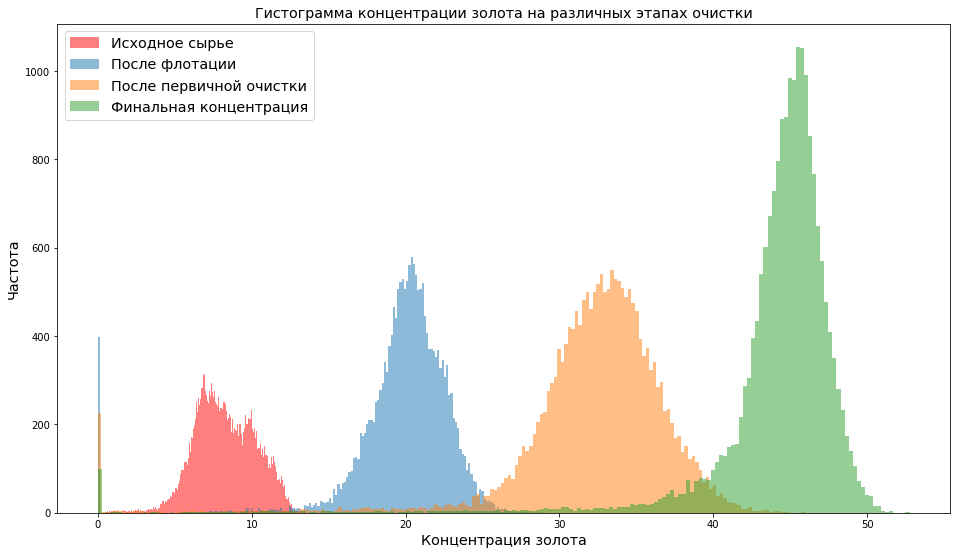

In [11]:
plt.figure(figsize=[16, 9])
plt.hist(
    df_full["rougher.input.feed_au"],
    bins=200,
    label="Исходное сырье",
    alpha=0.5,
    color="r",
)
plt.hist(
    df_full["rougher.output.concentrate_au"],
    bins=200,
    label="После флотации",
    alpha=0.5,
)
plt.hist(
    df_full["primary_cleaner.output.concentrate_au"],
    bins=200,
    label="После первичной очистки",
    alpha=0.5,
)
plt.hist(
    df_full["final.output.concentrate_au"],
    bins=200,
    label="Финальная концентрация",
    alpha=0.5,
)

plt.title(
    "Гистограмма концентрации золота на различных этапах очистки", fontsize="x-large"
)
plt.xlabel("Концентрация золота", fontsize="x-large")
plt.ylabel("Частота", fontsize="x-large")
plt.legend(loc="upper left", fontsize="x-large")
plt.show()

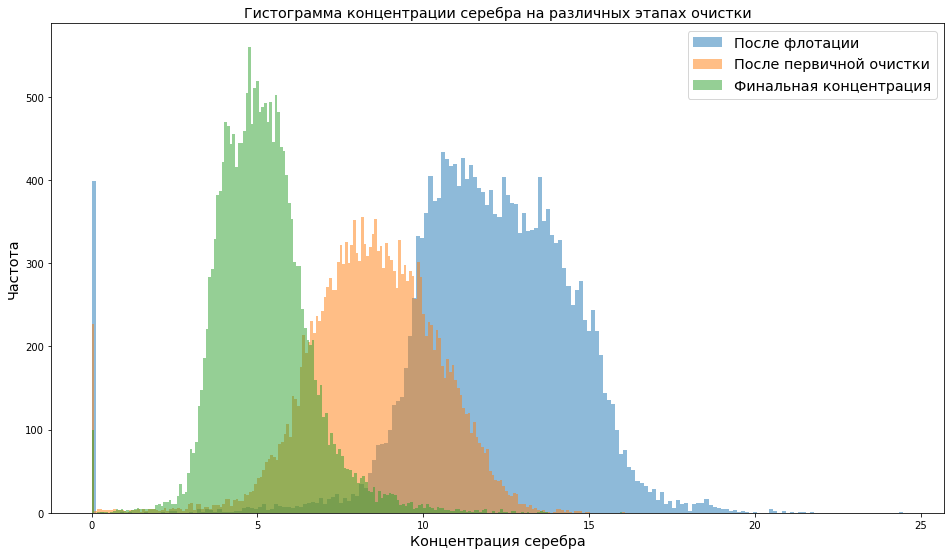

In [12]:
plt.figure(figsize=[16, 9])
plt.hist(
    df_full["rougher.output.concentrate_ag"],
    bins=200,
    label="После флотации",
    alpha=0.5,
)
plt.hist(
    df_full["primary_cleaner.output.concentrate_ag"],
    bins=200,
    label="После первичной очистки",
    alpha=0.5,
)
plt.hist(
    df_full["final.output.concentrate_ag"],
    bins=200,
    label="Финальная концентрация",
    alpha=0.5,
)

plt.title(
    "Гистограмма концентрации серебра на различных этапах очистки", fontsize="x-large"
)
plt.xlabel("Концентрация серебра", fontsize="x-large")
plt.ylabel("Частота", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.show()

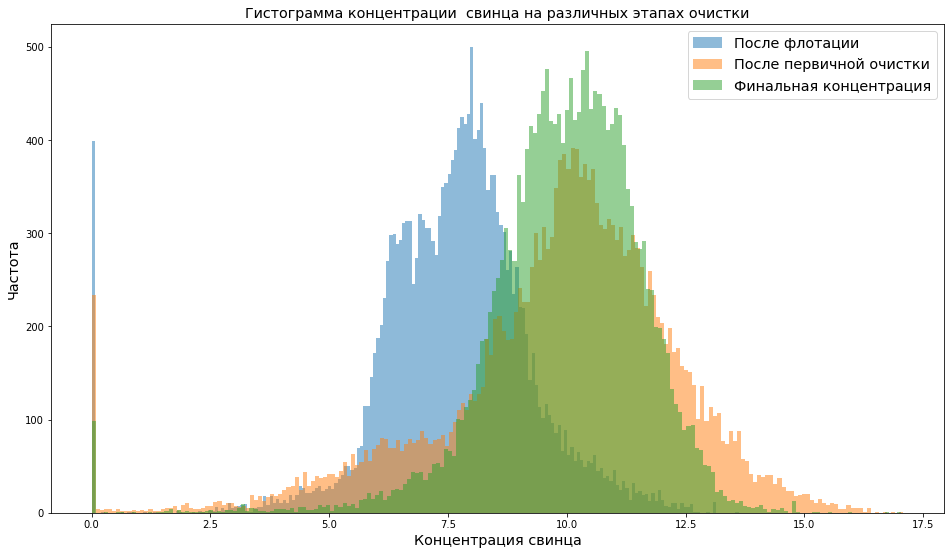

In [13]:
plt.figure(figsize=[16, 9])
plt.hist(
    df_full["rougher.output.concentrate_pb"],
    bins=200,
    label="После флотации",
    alpha=0.5,
)
plt.hist(
    df_full["primary_cleaner.output.concentrate_pb"],
    bins=200,
    label="После первичной очистки",
    alpha=0.5,
)
plt.hist(
    df_full["final.output.concentrate_pb"],
    bins=200,
    label="Финальная концентрация",
    alpha=0.5,
)

plt.title(
    "Гистограмма концентрации  свинца на различных этапах очистки", fontsize="x-large"
)
plt.xlabel("Концентрация свинца", fontsize="x-large")
plt.ylabel("Частота", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.show()

Удалим строки с аномалиями с нулевыми значениями в обучающей выборке, потому что данный сбой в измерениях может повлиять на другие значения.

In [14]:
df_train = df_train[
    (df_train["rougher.output.concentrate_pb"] != 0)
    & (df_train["primary_cleaner.output.concentrate_pb"] != 0)
    & (df_train["final.output.concentrate_pb"] != 0)
].reset_index(drop=True)

df_train = df_train[
    (df_train["rougher.output.concentrate_ag"] != 0)
    & (df_train["primary_cleaner.output.concentrate_ag"] != 0)
    & (df_train["final.output.concentrate_ag"] != 0)
].reset_index(drop=True)

df_train = df_train[
    (df_train["rougher.output.concentrate_au"] != 0)
    & (df_train["primary_cleaner.output.concentrate_au"] != 0)
    & (df_train["final.output.concentrate_au"] != 0)
].reset_index(drop=True)

Выводы:
* Гистограмма концентрации золота на различных этапах очистки представяет собой нормальное распределение с почти непересекающимися кривыми и небольшим стандартным отклонением;
* Заметны аномалии в виде нулевой концентрации;
* Концентрация золота после флотации составлет в среднем 20%, после первичной - 33%, после вторичной - 45%;
* Концентрация серебра в результате очистки в среднем падает с 13% до 5%
* Концентрация свинца в концетрате растёт с 8% до более чем 10% после флотации и остаётся таким в финальном концентрате.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

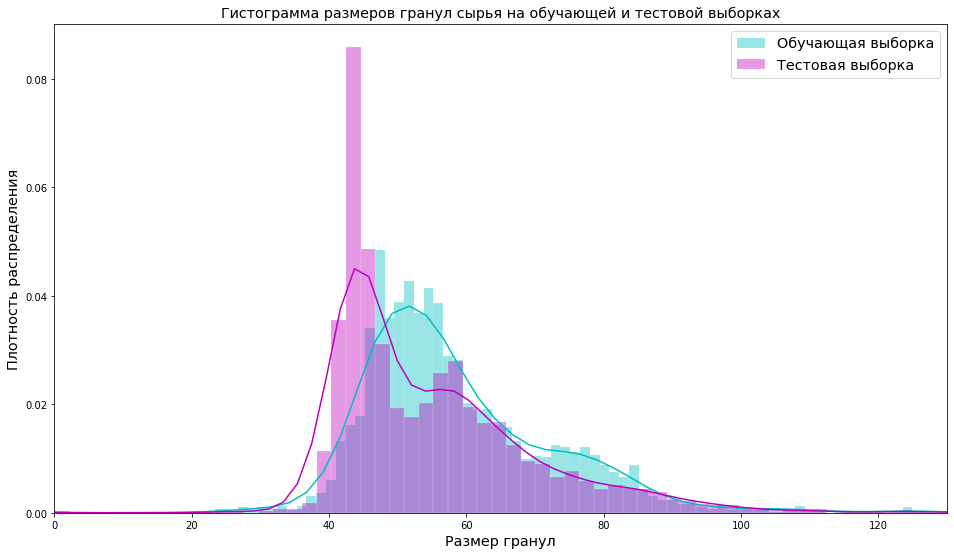

In [15]:
plt.figure(figsize=[16, 9])
data = [
    (df_train["rougher.input.feed_size"], "Обучающая выборка", "c"),
    (df_test["rougher.input.feed_size"], "Тестовая выборка", "m"),
]

for inputs, label, color in data:
    sns.histplot(
        inputs,
        label=label,
        kde=True,
        kde_kws=dict(cut=3),
        alpha=0.4,
        edgecolor=(1, 1, 1, 0.4),
        color=color,
        stat="density",
        common_norm=False,
    )

plt.title(
    "Гистограмма размеров гранул сырья на обучающей и тестовой выборках",
    fontsize="x-large",
)
plt.xlabel("Размер гранул", fontsize="x-large")
plt.ylabel("Плотность распределения", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.xlim([0, 130])
plt.show()

По форме распределений видно, что в обучающей выборке средняя гранула немного больше.
Распределения размеров гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, оценка модели будет правильной.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind(array1, array2, equal_var, alternative)`.

Нулева гипотеза - выборки равны

Альтернативная - не равны

In [16]:
alpha = 0.05

results = st.ttest_ind(
    df_train["rougher.input.feed_size"],
    df_test["rougher.input.feed_size"],
    equal_var=False,
)
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.4517241081111396e-40
Отвергаем нулевую гипотезу


Вывод: Значение p-value в отрицательной E-степени, p-value меньше выбранного уровня статистической значимости - нулевая гипотеза о равенстве двух выборок отвергается.

In [17]:
# Посчитаем относительную разность средних:
mean_diff = (
    df_train["rougher.input.feed_size"].mean()
    - df_test["rougher.input.feed_size"].mean()
)

print(
    "Разность средних: {0:.2%}".format(
        mean_diff / df_train["rougher.input.feed_size"].mean()
    )
)

Разность средних: 7.24%


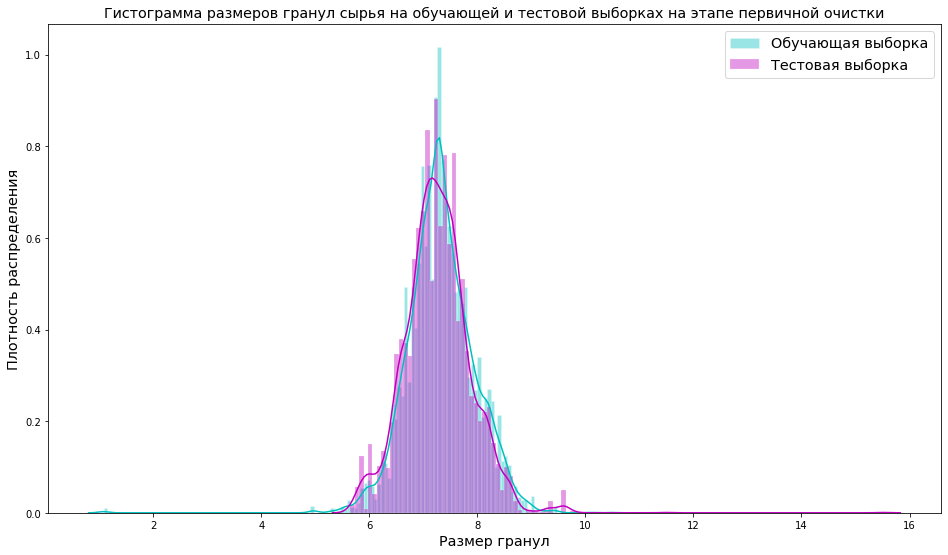

In [21]:
plt.figure(figsize=[16, 9])
data = [
    (df_train["primary_cleaner.input.feed_size"], "Обучающая выборка", "c"),
    (df_test["primary_cleaner.input.feed_size"], "Тестовая выборка", "m"),
]

for inputs, label, color in data:
    sns.histplot(
        inputs,
        label=label,
        kde=True,
        kde_kws=dict(cut=3),
        alpha=0.4,
        edgecolor=(1, 1, 1, 0.4),
        color=color,
        stat="density",
        common_norm=False,
    )

plt.title(
    "Гистограмма размеров гранул сырья на обучающей и тестовой выборках на этапе первичной очистки",
    fontsize="x-large",
)
plt.xlabel("Размер гранул", fontsize="x-large")
plt.ylabel("Плотность распределения", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.show()

Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

Нулева гипотеза - выборки равны. 
Альтернативная - не равны

In [28]:
alpha = 0.05

results = st.ttest_ind(
    df_train["primary_cleaner.input.feed_size"],
    df_test["primary_cleaner.input.feed_size"],
    equal_var=False,
)
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.866311919433146e-09
Отвергаем нулевую гипотезу


In [23]:
# Посчитаем относительную разность средних:
mean_diff = (
    df_train["primary_cleaner.input.feed_size"].mean()
    - df_test["primary_cleaner.input.feed_size"].mean()
)

print(
    "Разность средних: {0:.2%}".format(
        mean_diff / df_train["rougher.input.feed_size"].mean()
    )
)

Разность средних: 0.10%


Применив те же методы к сравнению размеров гранул сырья на обучающей и тестовой выборках на этапе первичной очистки, можно сказать, что значения так же не равны, но становятся крайне близкими. Поэтому оценка модели будет правильной.

### Исследование суммарной концентрации всех металлов на разных этапах очистки.

In [18]:
# Складываем выходные значения по этапам:
rougher_input = (
    df_full["rougher.input.feed_ag"]
    + df_full["rougher.input.feed_au"]
    + df_full["rougher.input.feed_pb"]
)

rougher_output = (
    df_full["rougher.output.concentrate_ag"]
    + df_full["rougher.output.concentrate_au"]
    + df_full["rougher.output.concentrate_pb"]
)

primary_output = (
    df_full["primary_cleaner.output.concentrate_ag"]
    + df_full["primary_cleaner.output.concentrate_au"]
    + df_full["primary_cleaner.output.concentrate_pb"]
)

final_output = (
    df_full["final.output.concentrate_ag"]
    + df_full["final.output.concentrate_au"]
    + df_full["final.output.concentrate_pb"]
)

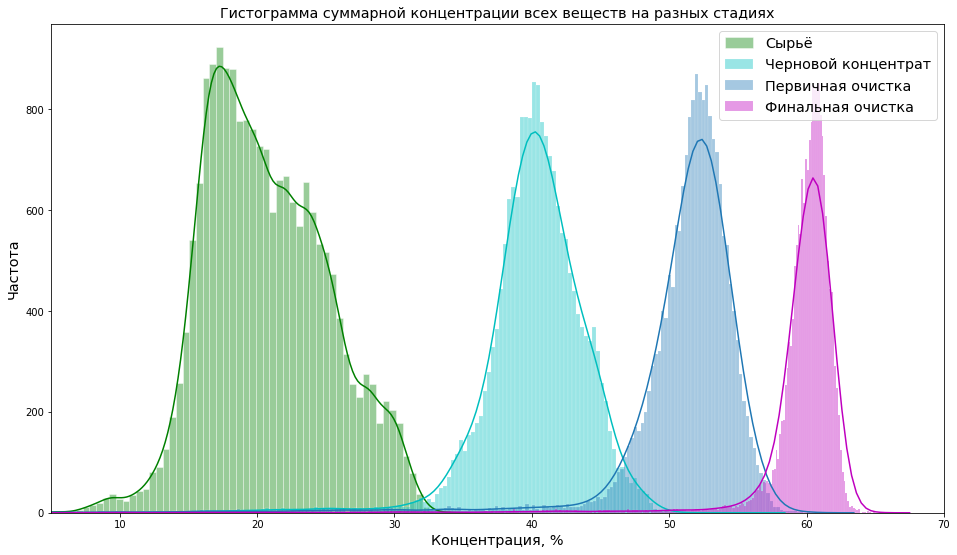

In [19]:
plt.figure(figsize=[16, 9])

# Данные и метки для графиков
data = [
    (rougher_input, "Сырьё", "g"),
    (rougher_output, "Черновой концентрат", "c"),
    (primary_output, "Первичная очистка", None),
    (final_output, "Финальная очистка", "m"),
]

# Построение гистограмм
for output, label, color in data:
    sns.histplot(
        output,
        label=label,
        kde=True,
        kde_kws=dict(cut=3),
        alpha=0.4,
        edgecolor=(1, 1, 1, 0.4),
        color=color,
    )

plt.title(
    "Гистограмма суммарной концентрации всех веществ на разных стадиях",
    fontsize="x-large",
)
plt.xlabel("Концентрация, %", fontsize="x-large")
plt.ylabel("Частота", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.xlim([5, 70])
plt.show()

Вывод: Суммарная концентрация основных металлов в на разных этапах производства постоянно растёт и составляет в среднем:
* 20% в руде;
* 40%  в черновом концентрате;
* 52% после первичной очистки;
* 60% после финальной очистки.


Также на каждом этапе сужается разброс значений концентрации.

## Модель

### Напишем функцию для вычисления итоговой sMAPE.

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

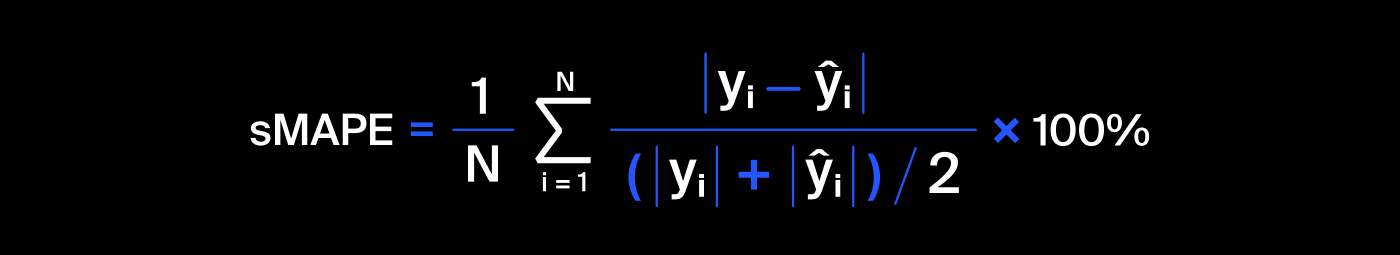

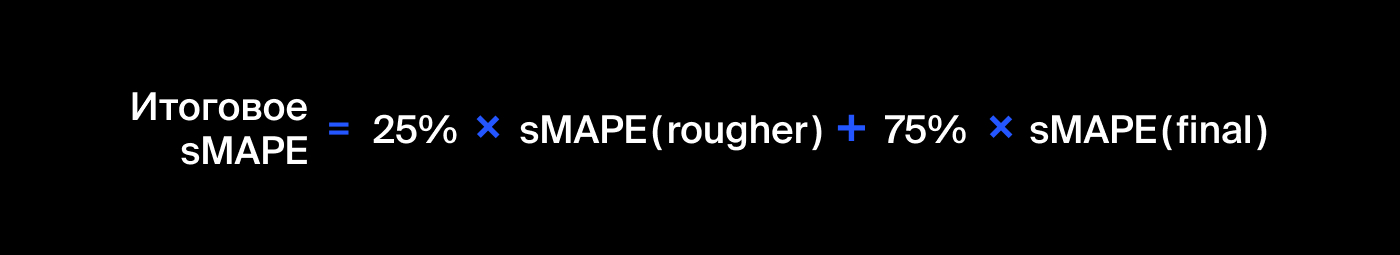

In [20]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()  # делимое
    scale = (abs(y_true) + abs(y_pred)) / 2  # делитель
    result = (error / scale) * 100
    return result.mean()


# Итоговая sMAPE:
def total_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

### Обучение разных моделей и выбор лучшей.

Обучите разные модели и оцените их качество. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [21]:
# Уберём из обучающей выборки признаки, которых нет в тестовой выборке:
columns_not_in_test = set(df_train.columns) - set(df_test.columns)
df_train = df_train.drop(columns=columns_not_in_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13720 entries, 0 to 13719
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13720 non-null  object 
 1   final.output.recovery                       13720 non-null  float64
 2   primary_cleaner.input.sulfate               13720 non-null  float64
 3   primary_cleaner.input.depressant            13720 non-null  float64
 4   primary_cleaner.input.feed_size             13720 non-null  float64
 5   primary_cleaner.input.xanthate              13720 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      13720 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    13720 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      13720 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    13720 non-null  float64
 10  primary_cl

In [22]:
# Удалим дату из датафреймов, так как библиотека sklearn не сможет корректно обработать этот столбец
df_train = df_train.drop("date", axis=1)
df_test = df_test.drop("date", axis=1)

Нужно спрогнозировать сразу две величины:
1. эффективность обогащения чернового концентрата `rougher.output.recovery`;
2. эффективность обогащения финального концентрата `final.output.recovery`.

In [23]:
# Получим валидационные выборки
features = df_train.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_r = df_train["rougher.output.recovery"]
target_f = df_train["final.output.recovery"]

features_train, features_valid, target_train_r, target_valid_r = train_test_split(
    features, target_r, test_size=0.25, random_state=12345
)
features_train, features_valid, target_train_f, target_valid_f = train_test_split(
    features, target_f, test_size=0.25, random_state=12345
)

In [24]:
# подстрижём тестовую выборку
df_test = df_test.head(len(features_valid))

In [25]:
# создаём переменные для тестовой выборки
features_test = df_test.drop(
    ["rougher.output.recovery", "final.output.recovery"], axis=1
)
target_test_r = df_test["rougher.output.recovery"]
target_test_f = df_test["final.output.recovery"]

# Выведем на экран размеры таблиц
print(features_train.shape)
print(target_train_r.shape)
print(target_train_f.shape)
print(features_test.shape)
print(target_test_r.shape)
print(target_test_f.shape)
print(target_valid_r.shape)
print(target_valid_f.shape)
print(features_valid.shape)

(10290, 52)
(10290,)
(10290,)
(3430, 52)
(3430,)
(3430,)
(3430,)
(3430,)
(3430, 52)


**Модель эффективности обогащения чернового концентрата**

Модель "Дерево Решений"

In [26]:
best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 16):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train_r)  # обучим модель на тренировочной выборке
    predictions_valid_r = model.predict(
        features_valid
    )  # получим предсказания модели на валидационной выборке
    result = smape(
        target_valid_r, predictions_valid_r
    )  # посчитаем значение метрики sMAPE на валидационной выборке
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print(
    "sMAPE наилучшей модели 'Дерево Решений' на валидационной выборке rougher:",
    best_result,
    "Глубина дерева:",
    best_depth,
)

sMAPE наилучшей модели 'Дерево Решений' на валидационной выборке rougher: 3.510838380015901 Глубина дерева: 13


Модель "Случайный лес"

In [27]:
# обучим с заданным количеством деревьев
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(280, 300, 10):
    for depth in range(11, 13):
        model = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        model.fit(
            features_train, target_train_r
        )  # обучим модель на тренировочной выборке
        predictions_valid = model.predict(
            features_valid
        )  # получим предсказания модели на валидационной выборке
        result = smape(
            target_valid_r, predictions_valid
        )  # посчитаем значение метрики sMAPE на валидационной выборке
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print(
    "sMAPE наилучшей модели 'Случайный лес' на валидационной выборке rougher:",
    best_result,
    "Количество деревьев:",
    best_est,
    "Глубина:",
    best_depth,
)

sMAPE наилучшей модели 'Случайный лес' на валидационной выборке rougher: 2.814258874097499 Количество деревьев: 290 Глубина: 12


Линейная регрессия

In [28]:
model = LinearRegression()
model.fit(features_train, target_train_r)
predictions_valid = model.predict(features_valid)
result = smape(target_valid_r, predictions_valid)
print("sMAPE модели линейной регрессии на валидационной выборке:", result)

sMAPE модели линейной регрессии на валидационной выборке: 4.746150228966541


**Модель эффективности обогащения финального концентрата**

In [29]:
best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train_f)
    predictions_valid_f = model.predict(features_valid)
    result = smape(target_valid_f, predictions_valid_f)
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print(
    "sMAPE наилучшей модели 'Дерево Решений' на валидационной выборке final:",
    best_result,
    "Глубина дерева:",
    best_depth,
)

sMAPE наилучшей модели 'Дерево Решений' на валидационной выборке final: 7.59087114788879 Глубина дерева: 10


In [30]:
# обучим с заданным количеством деревьев
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(160, 180, 10):
    for depth in range(8, 10):
        model = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        model.fit(
            features_train, target_train_f
        )  # обучим модель на тренировочной выборке
        predictions_valid = model.predict(
            features_valid
        )  # получим предсказания модели на валидационной выборке
        result = smape(
            target_valid_f, predictions_valid
        )  # посчитаем значение метрики sMAPE на валидационной выборке
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print(
    "sMAPE наилучшей модели 'Случайный лес' на валидационной выборке rougher:",
    best_result,
    "Количество деревьев:",
    best_est,
    "Глубина:",
    best_depth,
)

sMAPE наилучшей модели 'Случайный лес' на валидационной выборке rougher: 6.752672916790986 Количество деревьев: 170 Глубина: 9


Линейная регрессия

In [31]:
model = LinearRegression()
model.fit(features_train, target_train_f)
predictions_valid = model.predict(features_valid)
result = smape(target_valid_f, predictions_valid)
print("sMAPE модели линейной регрессии на валидационной выборке final:", result)

sMAPE модели линейной регрессии на валидационной выборке final: 8.231804418632992


Лучший результат показала модель "Случайный лес" - выбираем её для расчёта метрики качества.

In [32]:
model_r = RandomForestRegressor(random_state=12345, n_estimators=290, max_depth=12)
model_f = RandomForestRegressor(random_state=12345, n_estimators=170, max_depth=9)

model_r.fit(features_train, target_train_r)
model_f.fit(features_train, target_train_f)
y_pred_rougher = model_r.predict(features_valid)
y_pred_final = model_f.predict(features_valid)

res_v = total_smape(target_valid_r, y_pred_rougher, target_valid_f, y_pred_final)
print("Итоговая sMAPE модели на валидационной выборке: {:.2f} %".format(res_v))

Итоговая sMAPE модели на валидационной выборке: 5.77 %


**Проверка модели на тестовой выборке**

In [33]:
y_pred_rougher = model_r.predict(features_test)
y_pred_final = model_f.predict(features_test)
res_t = total_smape(target_test_r, y_pred_rougher, target_test_f, y_pred_final)
print("Итоговая sMAPE модели на тестовой выборке: {:.2f} %".format(res_t))

Итоговая sMAPE модели на тестовой выборке: 8.46 %


Результаты на тесте больше, чем на валидации, это говорит о том, что хорошо подобраны гиперпараметры.

**Мера адекватности модели - базовый уровень для сравнения**

In [34]:
dummy_r = DummyRegressor(strategy="median")
dummy_r.fit(features_train, target_train_r)
dummy_preds_r = dummy_r.predict(features_test)

dummy_f = DummyRegressor(strategy="median")
dummy_f.fit(features_train, target_train_f)
dummy_preds_f = dummy_f.predict(features_test)

res_d = total_smape(target_test_r, dummy_preds_r, target_test_f, dummy_preds_f)
print("Итоговая sMAPE базовой модели : {:.2f} %".format(res_d))

Итоговая sMAPE базовой модели : 8.54 %


Чисто технически метрика качества созданной модели превосходит метрику лучшей из базовых моделей.

## Итоговый вывод

Подготовлен **прототип модели машинного обучения** для компании, которая разрабатывает решения для эффективной работы промышленных предприятий. Модель должна **предсказать коэффициент восстановления золота из золотосодержащей руды**.

Получены данные с параметрами добычи и очистки. Модель поможет **оптимизировать производство**, чтобы не запускать предприятие с убыточными характеристиками.

В рамках данного проекта было необходимо **спрогнозировать две величины**: эффективность обогащения чернового и финального концентратов, из которых складывается итоговая **метрика** оценки качества модели - Итоговая **sMAPE**(англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). 

Валидационная выборка была использована как форма промежуточной оценки качества моделей, для чего дважды сделано деление обучающей выборки. Далее были рассмотрены разные модели машинного обучения для **решения задачи регрессии**. 

В ходе выполнения проекта были выполнены следующие шаги:

**Подготовка данных:**
* Проверен расчёт эффективности обогащения;
* Проанализированы признаки, недоступные в тестовой выборке;
* Проведена предобработка данных;    



**Анализ данных:**
* Показана концентрация металлов (Au, Ag, Pb) на различных этапах очистки;
* Сравнены распределения размеров гранул сырья на обучающей и тестовой выборках;
* Исследована суммарная концентрация всех веществ на разных стадиях:

**Построение модели:**
* Написана функция для вычисления итоговой sMAPE;
* Обучены разные модели и оценено их качество. Выбрана лучшая модель и проверена на тестовой выборке